In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1: Importing data   

In [2]:
df = pd.read_csv('invest.txt', sep=' ')
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### Question 2: Linear scatter plot of Invest *vs* GNP

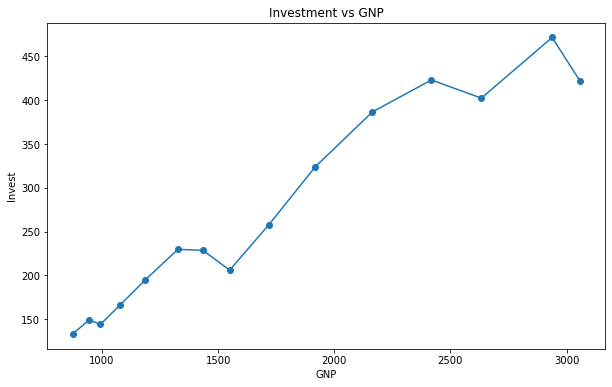

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['gnp'], y=df['invest'])
plt.plot(df['gnp'], df['invest'], linestyle='-')
plt.title('Investment vs GNP')
plt.xlabel('GNP')  # Gross National Product
plt.ylabel('Invest')
plt.show()

**We now apply the logarithm scale into the dataframe**

In [4]:
df_log = np.log(df)
df_log.head()

,year,gnp,invest,cpi,interest
0,7.584773,6.772394,4.892602,4.413283,1.640937
1,7.585281,6.850126,5.005958,4.463491,1.769855
2,7.585789,6.900429,4.971201,4.515792,1.783391
3,7.586296,6.982492,5.114395,4.564452,1.585145
4,7.586804,7.078257,5.273000,4.605170,1.504077


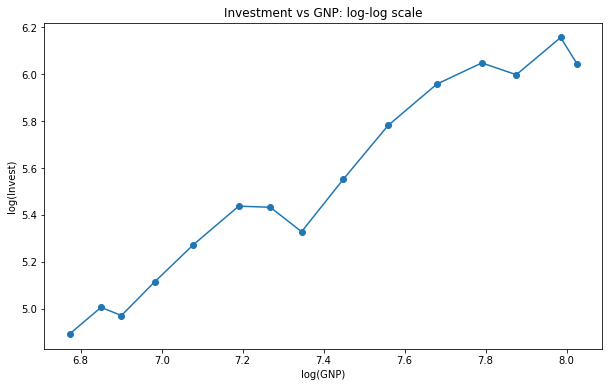

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df_log['gnp'], y=df_log['invest'])
plt.plot(df_log['gnp'], df_log['invest'], linestyle='-')
plt.title('Investment vs GNP: log-log scale')
plt.xlabel('log(GNP)')
plt.ylabel('log(Invest)')
plt.show()

## Question 3: Point estimation

In [6]:
x = np.array(df_log['gnp'])
Y = np.array(df_log['invest'])

x_bar = x.mean()
Y_bar = Y.mean()

**Computing the intercept $\hat{\beta_0}$ and the slope $\hat{\beta_1}$ of the linear regression**

In [7]:
B1 = np.sum((x - x_bar) * (Y - Y_bar)) / np.sum((x - x_bar) ** 2)
B0 = Y_bar - B1 * x_bar

print(f"Intercept B0 = {B0:.4f}")
print(f"Slope B1 = {B1:.4f}")

Intercept B0 = -1.9636
Slope B1 = 1.0153


**Computing the variance of the intercept $\hat{\beta_0}$ and of the slope $\hat{\beta_1}$**

In [8]:
# We first define the regression function
def Y_pred(x):
    return B0 + B1 * x

# Number of samples
n = len(x)

# Unbiased estimator of the variance of the residual
sigma2 = np.sum((Y - Y_pred(x)) ** 2) / (n - 2)

# Standard deviation of the regression coefficients
std_B0 = np.sqrt(sigma2 * (1 / n + x_bar ** 2 / np.sum((x - x_bar) ** 2)))
std_B1 = np.sqrt(sigma2 / np.sum((x - x_bar) ** 2))

print(f"Standard deviation of B0 = {std_B0:.4f}")
print(f"Standard deviation of B1 = {std_B1:.4f}")

Standard deviation of B0 = 0.4095
Standard deviation of B1 = 0.0554


**Computing the coefficient $R^{2}$ of the OLS**

In [9]:
R2 = 1 - np.sum((Y - Y_pred(x)) ** 2) / np.sum((Y - Y_bar) ** 2)
print(f"R2 = {R2:.4f}")

R2 = 0.9628


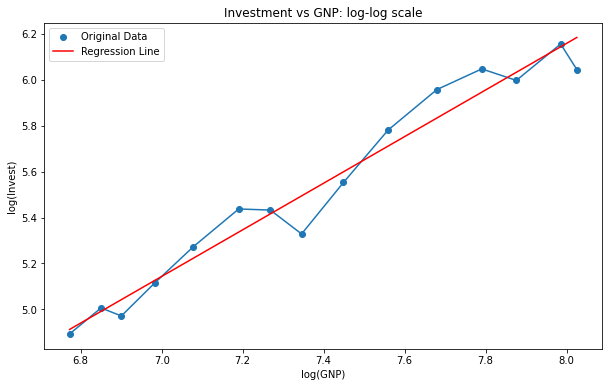

In [10]:
plt.figure(figsize=(10, 6))

# Orginial data
plt.scatter(x=df_log['gnp'], y=df_log['invest'], label='Original Data')
plt.plot(df_log['gnp'], df_log['invest'], linestyle='-')

# Regression line
plt.plot(df_log['gnp'], Y_pred(df_log['gnp']), color='red', label='Regression Line')

plt.title('Investment vs GNP: log-log scale')
plt.xlabel('log(GNP)')
plt.ylabel('log(Invest)')
plt.legend()
plt.show()

## Question 4: Significance of the slope

**The test to be performed is consisted by:**
* Null hypothesis: $H_{0} = \{\beta_{1} = 0\}$
* Alternative hypothesis: $H_{1} = \{\beta_{1} \neq 0\}$

The t-statistic test is of the following form:

$$
u = \frac{\hat \beta_{1} - \beta_{1}}{\sqrt{Var(\hat \beta_{1})}} \sim t\left(n-(p+1)\right)
$$

Given that there is only a single slope, $p = 1$. Moreover, under the null hypothesis, $\beta_{1} = 0$. So the test becomes:

$$
u = \frac{\hat \beta_{1}}{\sqrt{Var(\hat \beta_{1})}} \sim t\left(n-2\right)
$$

Then, the test is two-sided, so we compute the probability of observing a test statistic as extreme as $|u|$ in both tails of the distribution.

In [11]:
# t-statistic for B1
t_B1 = B1 / std_B1

# P-value for B1
p_B1 = 2 * (1 - stats.t.cdf(np.abs(t_B1), df=n-2))

print(f"t-statistic for B1 = {t_B1}")
print(f"P-value for B1 = {p_B1}")

t-statistic for B1 = 18.331984456866678
P-value for B1 = 1.1363709973011282e-10


Given that the obtained p-value is less than any feasible value of the significance level $\alpha$, **we reject the null hypothesis $H_{0}$**.

## Question 5:

For the GNP value 1000, estimate the necessary Investment, provide conﬁdence and prediction
intervals for the 90% level.

In [12]:
alpha = 0.1
